In [25]:
import pandas as pd

df = pd.read_csv('./fredupdated.csv', parse_dates=['observation_date'])
df.set_index('observation_date', inplace=True)
df.head(5)
start_date = '1959-01-01'
df = df.loc[start_date:]
df['Inflation_Rate'] = (df['CPIAUCSL'].pct_change(periods=12)) * 100
df.drop(columns=['CPIAUCSL'], inplace=True)
df.head(5)

/var/folders/n9/5g_wjd8s1c72ctvgc924q8140000gn/T/ipykernel_28822/2489932236.py:8: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Inflation_Rate'] = (df['CPIAUCSL'].pct_change(periods=12)) * 100


,UNRATE,GDP,PCE,FEDFUNDS,GS10,M2SL,GDPC1,CIVPART,PPIACO,CES0500000003,Inflation_Rate
observation_date,,,,,,,,,,,
1959-01-01,5.8,510.330,309.5,2.57,3.99,287.8,3352.129,59.2,31.700,NaN,NaN
1959-04-01,5.1,522.653,315.5,3.08,4.26,292.1,3427.667,59.3,31.767,NaN,NaN
1959-07-01,5.3,525.034,320.7,3.58,4.50,296.1,3430.057,59.3,31.667,NaN,NaN
1959-10-01,5.6,528.600,322.9,3.99,4.58,297.1,3439.832,59.3,31.533,NaN,NaN
1960-01-01,5.1,542.648,326.4,3.93,4.49,298.6,3517.181,58.9,31.667,NaN,NaN


In [26]:
df.info()
df.drop(columns=['CES0500000003'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 1959-01-01 to 2025-01-01
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UNRATE          264 non-null    float64
 1   GDP             264 non-null    float64
 2   PCE             264 non-null    float64
 3   FEDFUNDS        264 non-null    float64
 4   GS10            264 non-null    float64
 5   M2SL            264 non-null    float64
 6   GDPC1           264 non-null    float64
 7   CIVPART         264 non-null    float64
 8   PPIACO          264 non-null    float64
 9   CES0500000003   75 non-null     float64
 10  Inflation_Rate  253 non-null    float64
dtypes: float64(11)
memory usage: 24.8 KB


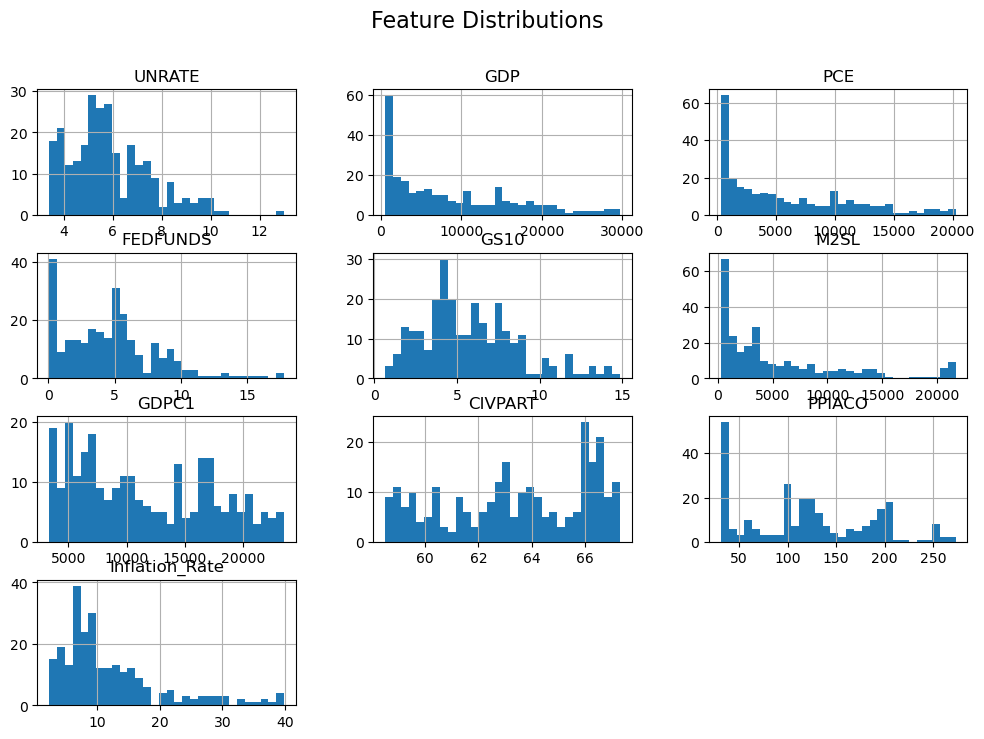

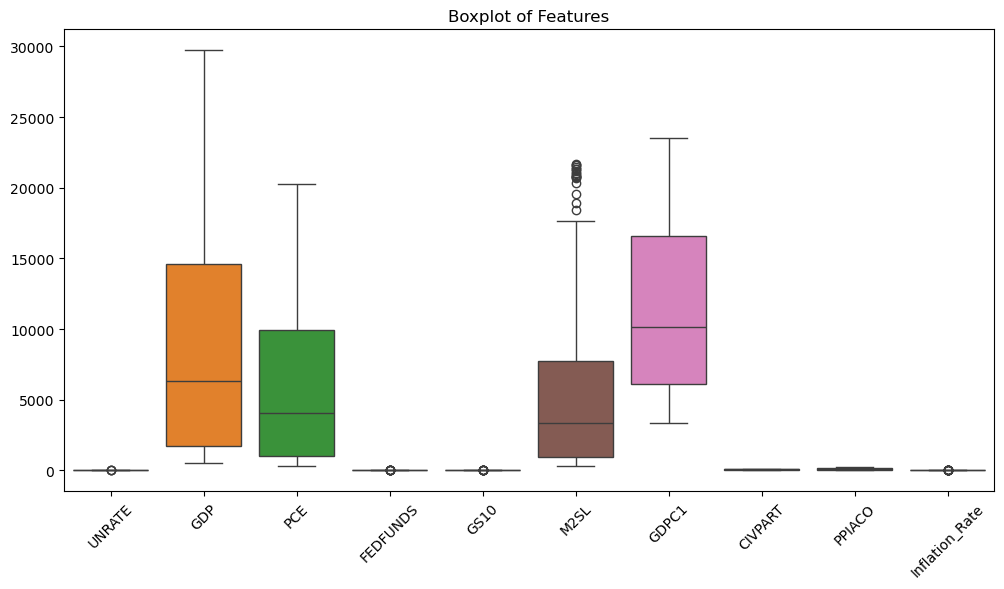

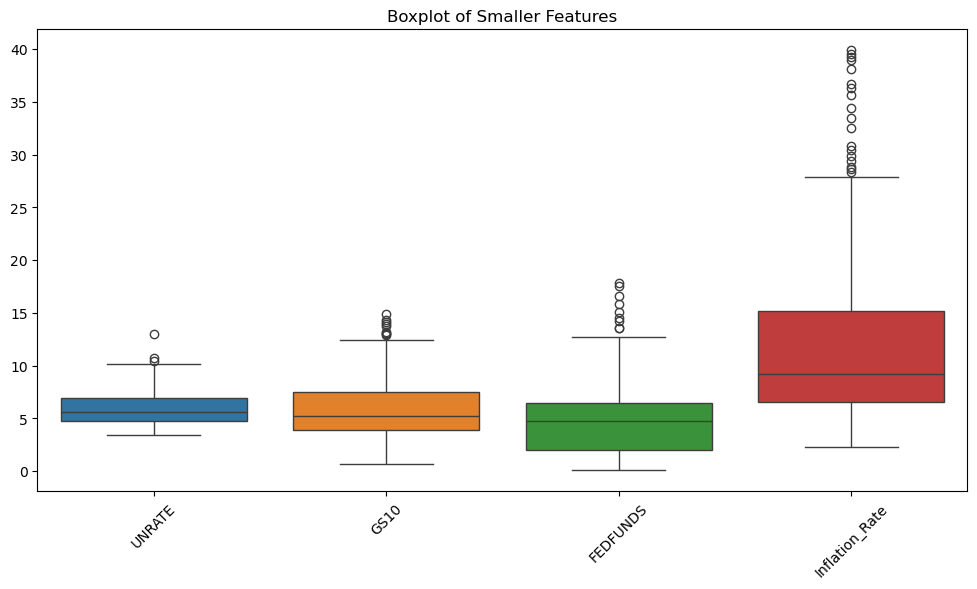

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller # Histograms

# histograms
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot of Features")
plt.show()

# Boxplots of Smaller Features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['UNRATE', 'GS10', 'FEDFUNDS', 'Inflation_Rate']])
plt.xticks(rotation=45)
plt.title("Boxplot of Smaller Features")
plt.show()

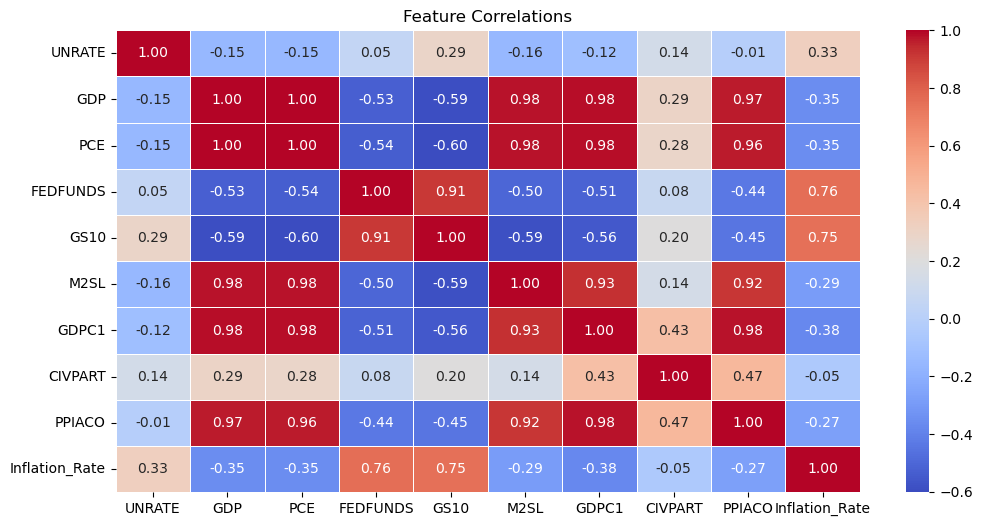

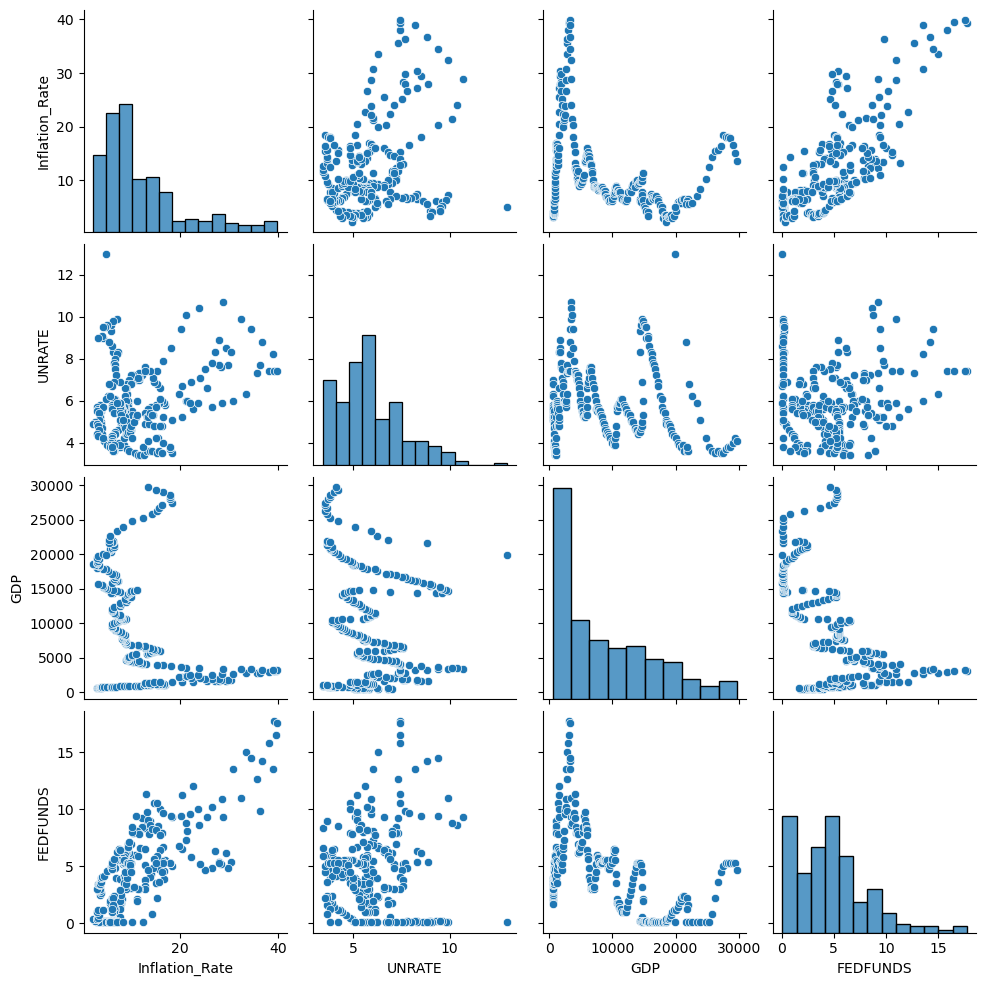

In [28]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlations")
plt.show()

# Plotting only a few right now

sns.pairplot(df[['Inflation_Rate', 'UNRATE', 'GDP', 'FEDFUNDS']])
plt.show()


=== Stationarity Tests for Unemployment Rate ===
ADF Statistic: -3.4487
p-value: 0.0094
Critical Values:
	1%: -3.4555
	5%: -2.8726
	10%: -2.5727
Result: Series is STATIONARY (reject H0)

KPSS Statistic: 0.1440
p-value: 0.1000
Critical Values:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390
Result: Series is STATIONARY (fail to reject H0)


/var/folders/n9/5g_wjd8s1c72ctvgc924q8140000gn/T/ipykernel_28822/2413397701.py:21: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series.dropna(), regression='c')


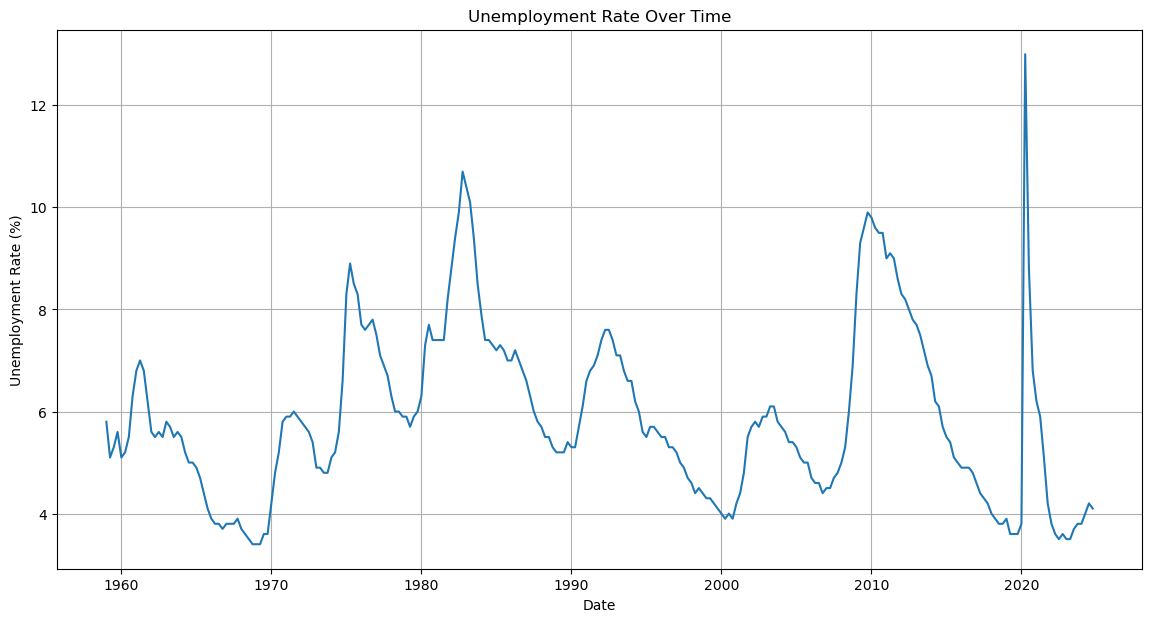

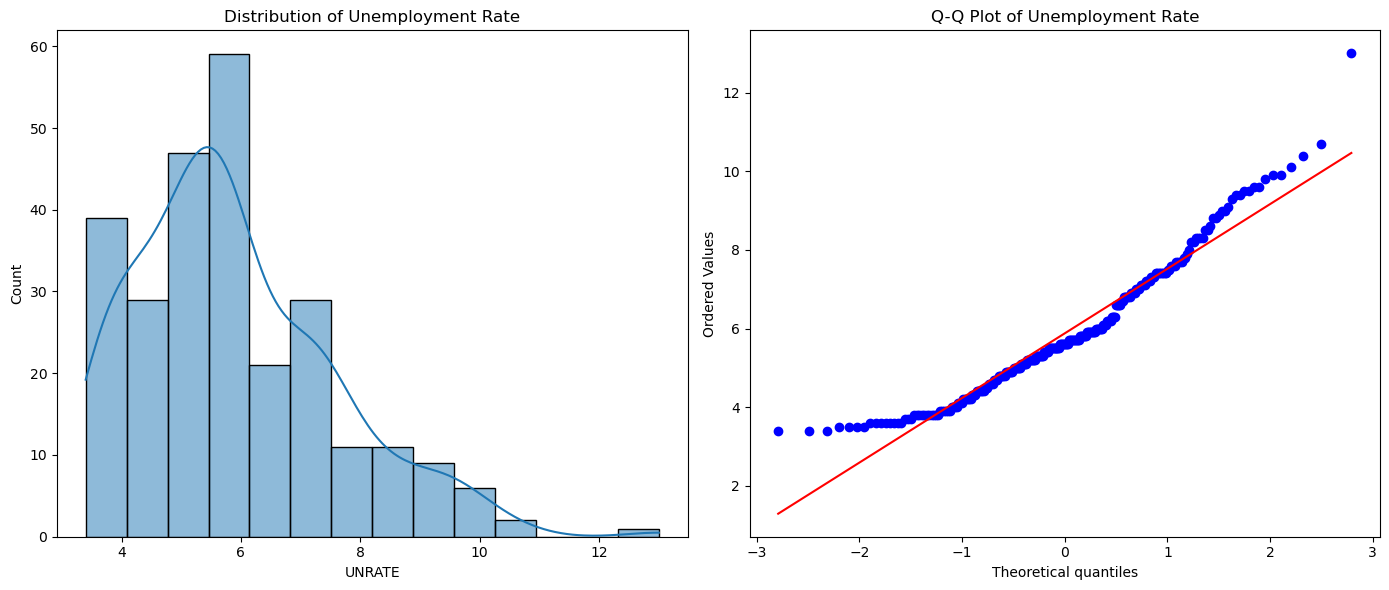

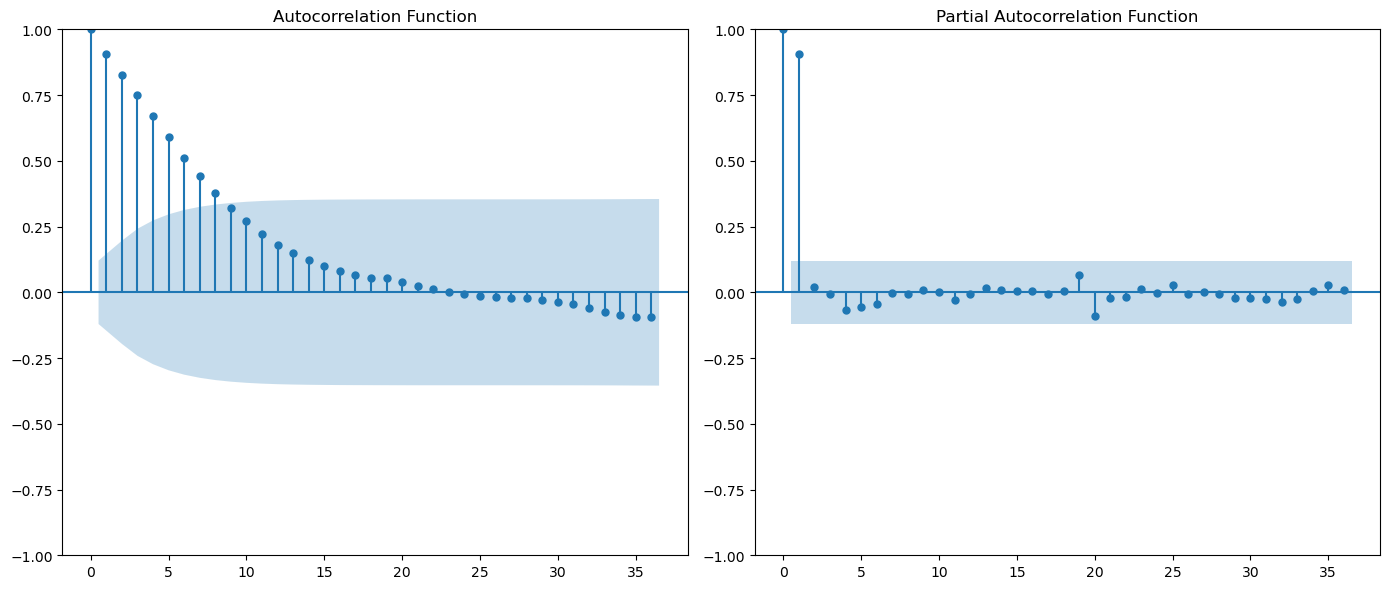

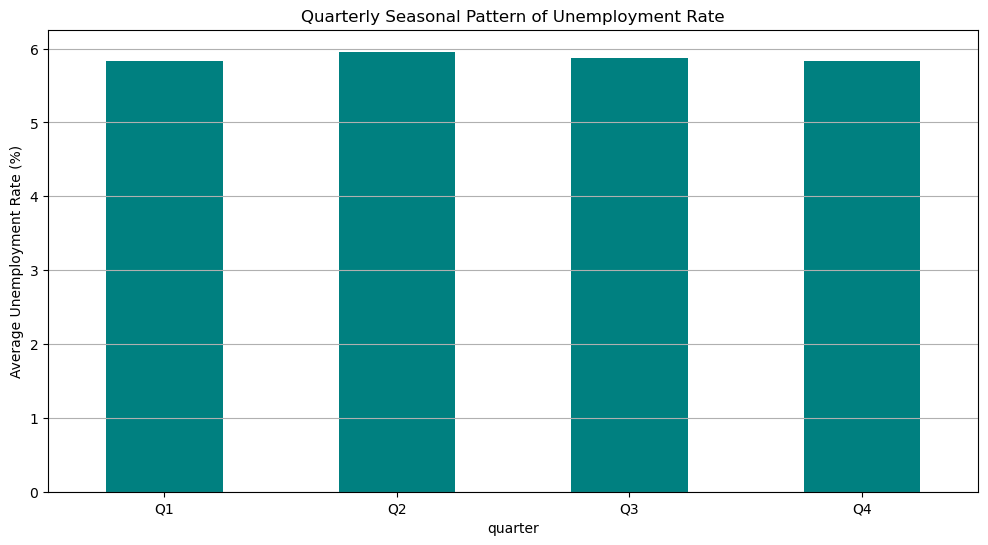

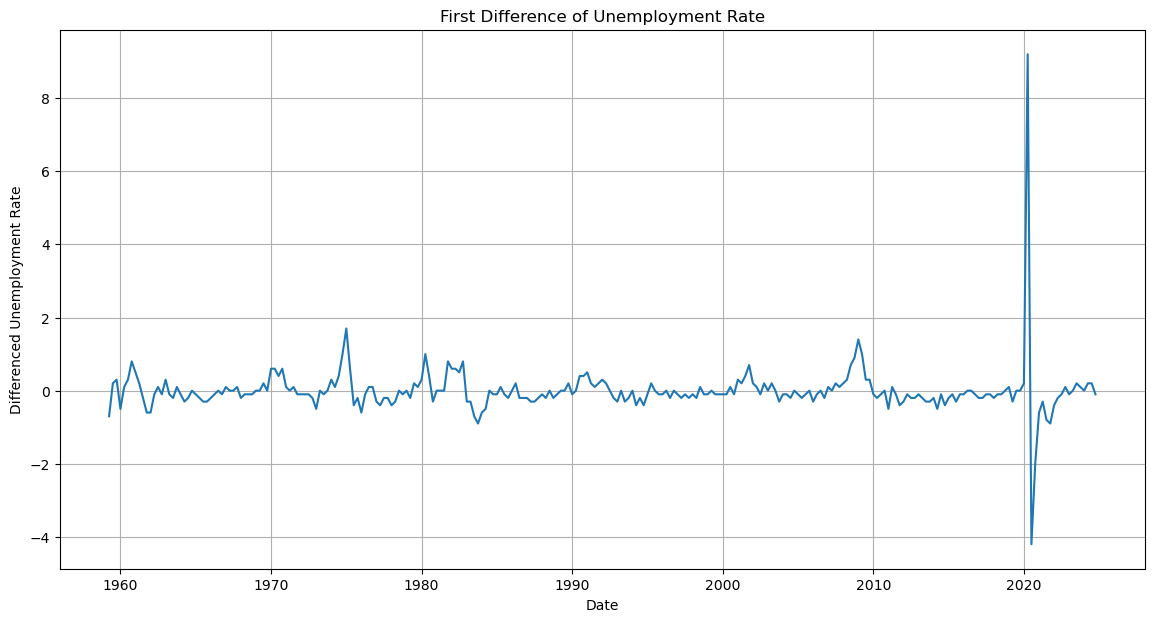


=== Stationarity Tests for First Differenced Unemployment Rate ===
ADF Statistic: -17.2876
p-value: 0.0000
Critical Values:
	1%: -3.4556
	5%: -2.8726
	10%: -2.5727
Result: Series is STATIONARY (reject H0)

KPSS Statistic: 0.0308
p-value: 0.1000
Critical Values:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390
Result: Series is STATIONARY (fail to reject H0)


/var/folders/n9/5g_wjd8s1c72ctvgc924q8140000gn/T/ipykernel_28822/2413397701.py:21: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series.dropna(), regression='c')


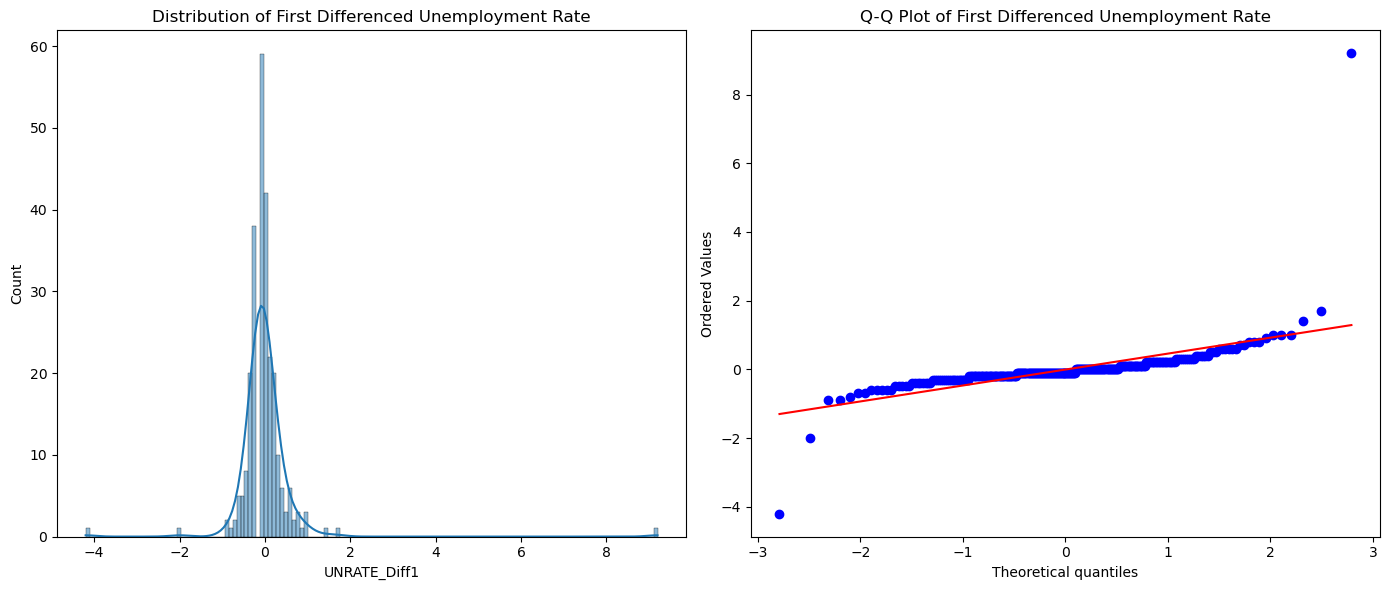

Cannot apply log transformation because UNRATE contains zero or negative values


In [29]:
from scipy import stats
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Stationarity Testing Function
def check_stationarity(series, title):
    print(f"\n=== Stationarity Tests for {title} ===")
    # Augmented Dickey-Fuller (ADF) Test
    adf_result = adfuller(series.dropna())
    print(f'ADF Statistic: {adf_result[0]:.4f}')
    print(f'p-value: {adf_result[1]:.4f}')
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f'\t{key}: {value:.4f}')
    if adf_result[1] < 0.05:
        print("Result: Series is STATIONARY (reject H0)")
    else:
        print("Result: Series is NON-STATIONARY (fail to reject H0)")
    
    # KPSS Test
    kpss_result = kpss(series.dropna(), regression='c')
    print(f'\nKPSS Statistic: {kpss_result[0]:.4f}')
    print(f'p-value: {kpss_result[1]:.4f}')
    print('Critical Values:')
    for key, value in kpss_result[3].items():
        print(f'\t{key}: {value:.4f}')
    if kpss_result[1] < 0.05:
        print("Result: Series is NON-STATIONARY (reject H0)")
    else:
        print("Result: Series is STATIONARY (fail to reject H0)")

# ----------------------------
# Analysis on the Response Variable: Unemployment Rate
# ----------------------------

# 1. Stationarity Test on Original Series
check_stationarity(df['UNRATE'], 'Unemployment Rate')

# 2. Time Series Plot
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['UNRATE'])
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()

# 3. Distribution Analysis
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['UNRATE'].dropna(), kde=True)
plt.title('Distribution of Unemployment Rate')

plt.subplot(1, 2, 2)
stats.probplot(df['UNRATE'].dropna(), plot=plt)
plt.title('Q-Q Plot of Unemployment Rate')
plt.tight_layout()
plt.show()

# 4. Autocorrelation Analysis
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plot_acf(df['UNRATE'].dropna(), lags=36, ax=plt.gca())
plt.title('Autocorrelation Function')

plt.subplot(1, 2, 2)
plot_pacf(df['UNRATE'].dropna(), lags=36, ax=plt.gca())
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

# 5. Seasonal Analysis (for quarterly data)
if len(df) >= 8:  # Ensure at least 2 years of quarterly data
    plt.figure(figsize=(12, 6))
    # Create a temporary 'quarter' column
    df['quarter'] = df.index.quarter
    seasonal = df.groupby('quarter')['UNRATE'].mean()
    seasonal.index = seasonal.index.map({1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'})
    seasonal.plot(kind='bar', color='teal')
    plt.title('Quarterly Seasonal Pattern of Unemployment Rate')
    plt.ylabel('Average Unemployment Rate (%)')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()
    # Remove the temporary column
    df.drop(columns=['quarter'], inplace=True, errors='ignore')

# 6. Differencing Transformation: First Difference
df['UNRATE_Diff1'] = df['UNRATE'].diff()

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['UNRATE_Diff1'])
plt.title('First Difference of Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Differenced Unemployment Rate')
plt.grid(True)
plt.show()

# Stationarity test on the first differenced series
check_stationarity(df['UNRATE_Diff1'].dropna(), 'First Differenced Unemployment Rate')

# Distribution Analysis of Differenced Series
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['UNRATE_Diff1'].dropna(), kde=True)
plt.title('Distribution of First Differenced Unemployment Rate')

plt.subplot(1, 2, 2)
stats.probplot(df['UNRATE_Diff1'].dropna(), plot=plt)
plt.title('Q-Q Plot of First Differenced Unemployment Rate')
plt.tight_layout()
plt.show()

# 7. Log Transformation (if all values are positive)
if (df['UNRATE'] > 0).all():
    df['Log_UNRATE'] = np.log(df['UNRATE'])
    
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['Log_UNRATE'])
    plt.title('Log-transformed Unemployment Rate')
    plt.xlabel('Date')
    plt.ylabel('Log(Unemployment Rate)')
    plt.grid(True)
    plt.show()
    
    # Stationarity test on log-transformed series
    check_stationarity(df['Log_UNRATE'].dropna(), 'Log-transformed Unemployment Rate')
    
    # Distribution Analysis of Log-transformed Series
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df['Log_UNRATE'].dropna(), kde=True)
    plt.title('Distribution of Log-transformed Unemployment Rate')
    
    plt.subplot(1, 2, 2)
    stats.probplot(df['Log_UNRATE'].dropna(), plot=plt)
    plt.title('Q-Q Plot of Log-transformed Unemployment Rate')
    plt.tight_layout()
    plt.show()
else:
    print("Cannot apply log transformation because UNRATE contains zero or negative values")

In [30]:
# Checking for missing values
print(df.isnull().sum())

# had 12 missing values for inflation rate
# I appled forward and backward fill to fill the missing values
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

print(df.isnull().sum())


UNRATE             1
GDP                1
PCE                1
FEDFUNDS           1
GS10               1
M2SL               1
GDPC1              1
CIVPART            1
PPIACO             1
Inflation_Rate    12
UNRATE_Diff1       2
dtype: int64
UNRATE            0
GDP               0
PCE               0
FEDFUNDS          0
GS10              0
M2SL              0
GDPC1             0
CIVPART           0
PPIACO            0
Inflation_Rate    0
UNRATE_Diff1      0
dtype: int64


/var/folders/n9/5g_wjd8s1c72ctvgc924q8140000gn/T/ipykernel_28822/3892333679.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
/var/folders/n9/5g_wjd8s1c72ctvgc924q8140000gn/T/ipykernel_28822/3892333679.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [31]:
# Feature Engineering
# 1. Lag Features
lag_features = ['UNRATE', 'GDP', 'FEDFUNDS', 'GS10', 'Inflation_Rate']
lags = [1, 4]  

for col in lag_features:
    for lag in lags:
        df[f'{col}_Lag{lag}Q'] = df[col].shift(lag)

df.dropna(inplace=True)
print(df.head())

                  UNRATE      GDP    PCE  FEDFUNDS  GS10   M2SL     GDPC1  \
observation_date                                                            
1960-01-01           5.1  542.648  326.4      3.93  4.49  298.6  3517.181   
1960-04-01           5.2  541.080  332.2      3.70  4.26  301.1  3498.246   
1960-07-01           5.5  545.604  332.1      2.94  3.83  306.5  3515.385   
1960-10-01           6.3  540.197  334.0      2.30  3.89  310.9  3470.278   
1961-01-01           6.8  545.018  334.5      2.00  3.79  316.3  3493.703   

                  CIVPART  PPIACO  Inflation_Rate  ...  UNRATE_Lag1Q  \
observation_date                                   ...                 
1960-01-01           58.9  31.667        3.842307  ...           5.6   
1960-04-01           59.6  31.733        3.842307  ...           5.1   
1960-07-01           59.6  31.633        3.842307  ...           5.2   
1960-10-01           59.6  31.700        3.842307  ...           5.5   
1961-01-01           59.6  3

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select predictor variables (excluding UNRATE, the response variable)
X = df.drop(columns=['UNRATE'])

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Print VIF values
print(vif_data)


                 Feature           VIF
0                    GDP  44389.271589
1                    PCE  17712.759067
2               FEDFUNDS     86.300082
3                   GS10    344.999680
4                   M2SL    145.861551
5                  GDPC1    716.956211
6                CIVPART    139.365831
7                 PPIACO    372.962999
8         Inflation_Rate    523.082315
9           UNRATE_Diff1      4.803228
10          UNRATE_Lag1Q    193.664601
11          UNRATE_Lag4Q    159.526457
12             GDP_Lag1Q  31255.620906
13             GDP_Lag4Q   7566.801240
14        FEDFUNDS_Lag1Q     99.755062
15        FEDFUNDS_Lag4Q     43.445854
16            GS10_Lag1Q    395.872226
17            GS10_Lag4Q    122.416447
18  Inflation_Rate_Lag1Q    738.546374
19  Inflation_Rate_Lag4Q    100.714881


In [ ]:
# Drop highly correlated features while keeping the most informative ones
drop_cols = [
    'GDP',  # Keep GDPC1 instead
    'PCE',  # Redundant with GDP
    'M2SL',  # Redundant with GDP
    'PPIACO',  # Redundant with GDP
    'GS10',  # Keep FEDFUNDS instead
]

df = df.drop(columns=drop_cols)

# Print remaining features
print("Final selected features:")
print(df.columns.tolist())


✅ Final selected features:
['UNRATE', 'FEDFUNDS', 'GDPC1', 'CIVPART', 'Inflation_Rate', 'UNRATE_Diff1', 'UNRATE_Lag1Q', 'UNRATE_Lag4Q', 'GDP_Lag1Q', 'GDP_Lag4Q', 'FEDFUNDS_Lag1Q', 'FEDFUNDS_Lag4Q', 'GS10_Lag1Q', 'GS10_Lag4Q', 'Inflation_Rate_Lag1Q', 'Inflation_Rate_Lag4Q']


In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select predictor variables (excluding UNRATE, the response variable)
X = df.drop(columns=['UNRATE'])

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Print VIF values
print(vif_data)

                 Feature          VIF
0               FEDFUNDS    63.470395
1                  GDPC1   299.663653
2                CIVPART    78.559551
3         Inflation_Rate   445.291486
4           UNRATE_Diff1     1.328304
5           UNRATE_Lag1Q   178.321936
6           UNRATE_Lag4Q   142.278236
7              GDP_Lag1Q  6489.850544
8              GDP_Lag4Q  7086.356910
9         FEDFUNDS_Lag1Q    82.845856
10        FEDFUNDS_Lag4Q    41.657386
11            GS10_Lag1Q   128.399080
12            GS10_Lag4Q   109.091324
13  Inflation_Rate_Lag1Q   662.970411
14  Inflation_Rate_Lag4Q    86.243495


In [ ]:
# Drop remaining high-VIF features while keeping key predictors
drop_cols = [
    'GDP_Lag1Q', 'GDP_Lag4Q',  # GDP lags too collinear, keeping GDPC1 instead
    'Inflation_Rate_Lag1Q',  # Drop due to high correlation with Inflation_Rate
    'GS10_Lag1Q',  # Drop short-term, keep GS10_Lag4Q (long-term rates)
    'FEDFUNDS_Lag1Q'  # Drop, keeping FEDFUNDS
]

df = df.drop(columns=drop_cols)

# Print final selected features
print("Final selected features after reducing VIF:")
print(df.columns.tolist())

# Recalculate VIF one last time to confirm improvement
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop(columns=['UNRATE'])
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("Final VIF values:")
print(vif_data)

✅ Final selected features after reducing VIF:
['UNRATE', 'FEDFUNDS', 'GDPC1', 'CIVPART', 'Inflation_Rate', 'UNRATE_Diff1', 'UNRATE_Lag1Q', 'UNRATE_Lag4Q', 'FEDFUNDS_Lag4Q', 'GS10_Lag4Q', 'Inflation_Rate_Lag4Q']
Final VIF values:
                Feature        VIF
0              FEDFUNDS  20.137826
1                 GDPC1  10.674332
2               CIVPART  53.640586
3        Inflation_Rate  33.780215
4          UNRATE_Diff1   1.183120
5          UNRATE_Lag1Q  51.003675
6          UNRATE_Lag4Q  44.731696
7        FEDFUNDS_Lag4Q  33.374718
8            GS10_Lag4Q  62.675706
9  Inflation_Rate_Lag4Q  36.086032


In [36]:
# Drop remaining high-VIF features while keeping most relevant predictors
drop_cols = [
    'CIVPART',  # Too correlated with UNRATE
    'UNRATE_Lag4Q',  # Redundant with UNRATE_Lag1Q
    'GS10_Lag4Q',  # High VIF, FEDFUNDS already captures monetary policy
    'Inflation_Rate_Lag4Q'  # High VIF, keeping Inflation_Rate instead
]

df = df.drop(columns=drop_cols)

# Print final selected features
print("Final refined feature set:")
print(df.columns.tolist())

# Recalculate VIF after the final refinement
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop(columns=['UNRATE'])
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("Final VIF values after last refinement:")
print(vif_data)

Final refined feature set:
['UNRATE', 'FEDFUNDS', 'GDPC1', 'Inflation_Rate', 'UNRATE_Diff1', 'UNRATE_Lag1Q', 'FEDFUNDS_Lag4Q']
Final VIF values after last refinement:
          Feature        VIF
0        FEDFUNDS  11.894414
1           GDPC1   4.261319
2  Inflation_Rate   8.596765
3    UNRATE_Diff1   1.116914
4    UNRATE_Lag1Q   8.776151
5  FEDFUNDS_Lag4Q  13.070529


In [37]:
# Define train-test split (80% train, 20% test, preserving time order)
train_size = int(0.8 * len(df))
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Define X (features) and y (target)
X_train, y_train = train.drop(columns=['UNRATE']), train['UNRATE']
X_test, y_test = test.drop(columns=['UNRATE']), test['UNRATE']

# Print dataset sizes
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

Train size: (208, 6), Test size: (53, 6)


In [38]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data, transform both train & test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Feature scaling completed (for Ridge & Lasso)")

Feature scaling completed (for Ridge & Lasso)


In [39]:
# model 1: Multivariate OLS Regression
import statsmodels.api as sm

# Add a constant term for intercept
X_train_ols = sm.add_constant(X_train)
X_test_ols = sm.add_constant(X_test)

# Fit OLS model
ols_model = sm.OLS(y_train, X_train_ols).fit()

# Print summary of OLS model
print(ols_model.summary())

# Predict on test set
y_pred_ols = ols_model.predict(X_test_ols)

# Evaluate OLS performance
from sklearn.metrics import mean_squared_error, r2_score

mse_ols = mean_squared_error(y_test, y_pred_ols)
r2_ols = r2_score(y_test, y_pred_ols)

print(f"OLS Model - MSE: {mse_ols:.4f}, R²: {r2_ols:.4f}")


                            OLS Regression Results                            
Dep. Variable:                 UNRATE   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.427e+25
Date:                Mon, 10 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:23:57   Log-Likelihood:                 5320.6
No. Observations:                 208   AIC:                        -1.063e+04
Df Residuals:                     201   BIC:                        -1.060e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.943e-16   7.11e-13     -0.

In [40]:
# model 2: Regularized Regression (Ridge & Lasso)
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # Adjust alpha for regularization strength
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression - MSE: {mse_ridge:.4f}, R²: {r2_ridge:.4f}")

# Lasso Regression
lasso_model = Lasso(alpha=0.1)  # Adjust alpha for feature selection effect
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression - MSE: {mse_lasso:.4f}, R²: {r2_lasso:.4f}")

Ridge Regression - MSE: 0.0008, R²: 0.9998
Lasso Regression - MSE: 0.1812, R²: 0.9476


In [41]:
# model 3: Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create polynomial features (degree=2 for quadratic terms)
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Fit Polynomial Regression Model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression - MSE: {mse_poly:.4f}, R²: {r2_poly:.4f}")

Polynomial Regression - MSE: 0.0002, R²: 0.9999


In [42]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["OLS Regression", "Ridge Regression", "Lasso Regression", "Polynomial Regression"],
    "MSE": [mse_ols, mse_ridge, mse_lasso, mse_poly],
    "R² Score": [r2_ols, r2_ridge, r2_lasso, r2_poly]
})

print(results)

                   Model       MSE  R² Score
0         OLS Regression  0.000189  0.999945
1       Ridge Regression  0.000843  0.999756
2       Lasso Regression  0.181188  0.947617
3  Polynomial Regression  0.000189  0.999945
